<a href="https://colab.research.google.com/github/RaquelHernanz/Projects_II_HeartDataset/blob/master/Dataset_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import copy
import os
import math

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Import and general information
The import of the dataset is throught a CSV file from Kaggle website.

## Dataset Overview

This original dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. In the beginning, it contained 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. **The names and social security numbers of the patients were recently removed from the database, replaced with dummy values**.

## Columns Description and Mapping

| Column       | Description                                           | Possible Values / Mapping |
|-------------|-------------------------------------------------------|---------------------------|
| **age**     | Age of the patient in years                            | Numeric Interval (29 – 77)         |
| **sex**     | Gender of the patient                                  | Nominal (0 = Female, 1 = Male)      |
| **cp**      | Chest pain type                                       | Ordinal (0 = Typical angina <br> 1 = Atypical angina <br> 2 = Non-anginal pain <br> 3 = Asymptomatic) |
| **trestbps**| Resting blood pressure (mm Hg)                        | Numeric Interval                   |
| **chol**    | Serum cholesterol (mg/dl)                              | Numeric Interval                   |
| **fbs**     | Fasting blood sugar > 120 mg/dl                        | Nominal (0 = False, 1 = True)       |
| **restecg** | Resting electrocardiographic results                   | Ordinal (0 = Normal <br> 1 = ST-T wave abnormality <br> 2 = Left ventricular hypertrophy) |
| **thalach** | Maximum heart rate achieved                             | Numeric Interval                   |
| **exang**   | Exercise-induced angina                                | Nominal (0 = No, 1 = Yes)           |
| **oldpeak** | ST depression induced by exercise relative to rest     | Numeric Ratio                   |
| **slope**   | Slope of the peak exercise ST segment                  | Ordinal (0 = Upsloping <br> 1 = Flat <br> 2 = Downsloping) |
| **ca**      | Number of major vessels colored by fluoroscopy         | Numeric Interval (0 – 4)             |
| **thal**    | Thalassemia type                                       | Ordinal (0 = Unknown <br> 1 = Fixed defect <br> 2 = Normal <br> 3 = Reversible defect) |
| **target**  | Heart disease presence                                  | Nominal (0 = No heart disease <br> 1 = Heart disease) |

In [2]:
heart_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
#Let's see the first rows of the dataset
heart_dataset.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

## Preliminar view of the dataset

##### 1. The dataset does not present missing values.

In [3]:
#Missing values check
print (heart_dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


##### 2. The dataset contains 14 columns of attributes.

In [4]:
# Check total number of columns
heart_dataset.info()
heart_dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### 3. We have a total of 1025 patients, 526 have a heart related disease while 499 don't present any cardiovascular condition.

In [5]:
# Count the number of patients for each type
heart_dataset["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

##### 4. According to the *duplicated().sum()* the dataset has 723 rows duplicates. At first glance, it could be considered the 70,53% of the dataset's rows are affected, however, due to the removal of the names and social security numbers we cannot identify whether it has true duplicate rows or not.

In [6]:
# Check for duplicate rows
duplicates = heart_dataset.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {duplicates/len(heart_dataset)*100:.2f}%")

# Analyze which columns are causing duplicates
print("\nSample of duplicate rows:")
print(heart_dataset[heart_dataset.duplicated(keep=False)].sort_values(by=list(heart_dataset.columns)).head(10))

Total duplicate rows: 723
Percentage of duplicates: 70.54%

Sample of duplicate rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
60    29    1   1       130   204    0        0      202      0      0.0   
64    29    1   1       130   204    0        0      202      0      0.0   
118   29    1   1       130   204    0        0      202      0      0.0   
668   29    1   1       130   204    0        0      202      0      0.0   
12    34    0   1       118   210    0        1      192      0      0.7   
15    34    0   1       118   210    0        1      192      0      0.7   
779   34    0   1       118   210    0        1      192      0      0.7   
143   34    1   3       118   182    0        0      174      0      0.0   
201   34    1   3       118   182    0        0      174      0      0.0   
572   34    1   3       118   182    0        0      174      0      0.0   

     slope  ca  thal  target  
60       2   0     2       1  
64       2   0 

# 2. Statistical Information

**Purpose**: The `describe()` method provides a comprehensive statistical summary of all numeric variables, including:
- **Central Tendency**: Mean (average value)
- **Dispersion**: Standard deviation (variability around the mean)
- **Distribution Shape**: Min, max, and quartiles (25%, 50%, 75%)

**Clinical Relevance**: These statistics help to assess whether the dataset represents a typical patient population or has unusual characteristics that might affect generalizability.

  ### **Results Summary**

| Attribute    | Mean ± SD    | Range   | Notes                                            |
| ------------ | ------------ | ------- | ------------------------------------------------ |
| **age**      | 54.4 ± 9.1   | 29–77   | Most patients are between 45–63 years old.       |
| **sex**      | 0.70 ± 0.46  | 0–1     | ~75% male, 25% female → unbalanced sex ratio.    |
| **trestbps** | 131.6 ± 17.5 | 94–200  | Normal to slightly elevated blood pressure.      |
| **chol**     | 246 ± 51.6   | 126–564 | Some extreme outliers, e.g., one with 526 mg/dL. |
| **thalach**  | 149 ± 23.0   | 71–202  | Heart rate normally distributed.                 |
| **oldpeak**  | 1.07 ± 1.18  | 0–6.2   | ST depression shows right-skewed distribution.   |
| **ca**       | 0.75 ± 1.03  | 0–3     | Number of affected coronary vessels.             |
| **thal**     | 2.32 ± 0.62  | 0–3     | Most values = 2 → “reversible defect”.           |


## Statistical Table

In [7]:
heart_dataset.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

## Box Plots
**Purpose**: Box plots (box-and-whisker diagrams) provide a standardized way to visualize the distribution of data through five key statistics:
- Minimum (excluding outliers)
- First quartile (Q1, 25th percentile)
- Median (Q2, 50th percentile)
- Third quartile (Q3, 75th percentile)
- Maximum (excluding outliers)

**Outlier definition**: Points beyond 1.5 × IQR (Interquartile Range) from the quartiles are displayed as individual points, indicating potential outliers.

**Outliers detected in**:
- **chol**
- **trestbps**
- **oldpeak**
- **thalach**

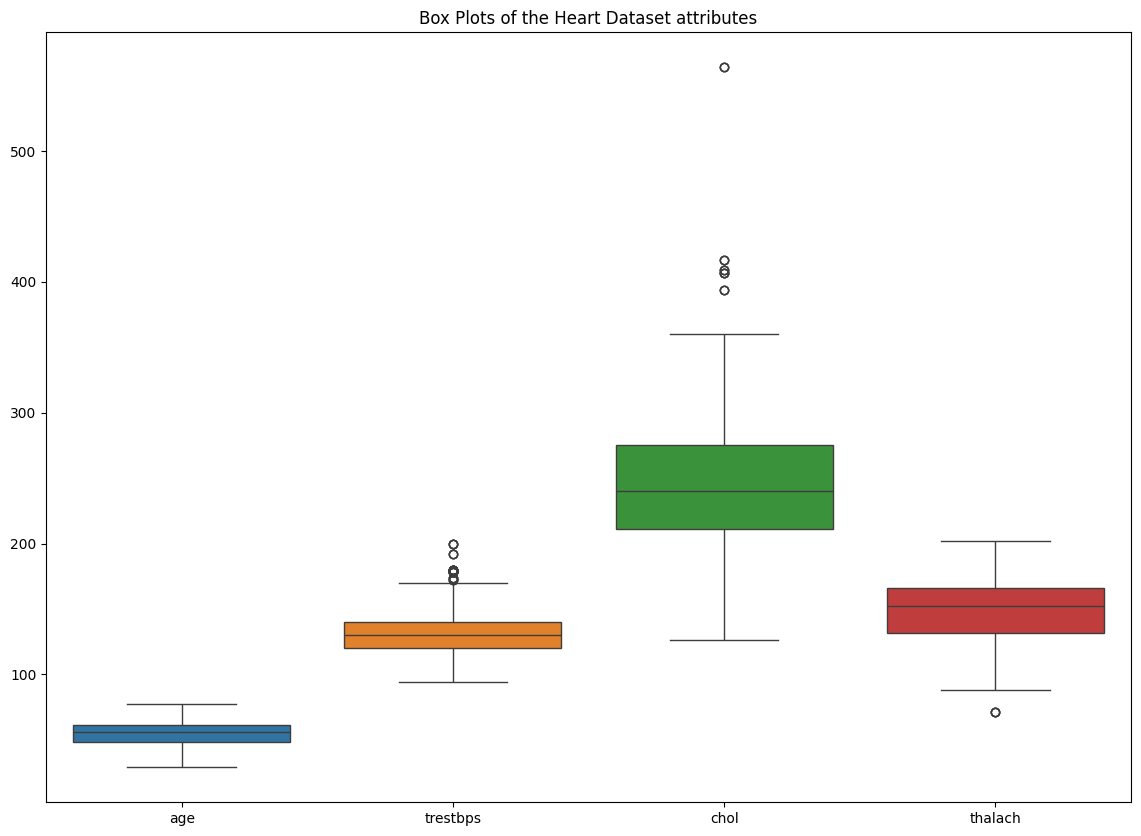

In [8]:
# Boxplot
cols = ["age", "trestbps", "chol", "thalach"]
plt.figure(figsize=(14, 10))
sns.boxplot(data=heart_dataset[cols], orient='v')
plt.title('Box Plots of the Heart Dataset attributes')
plt.show()

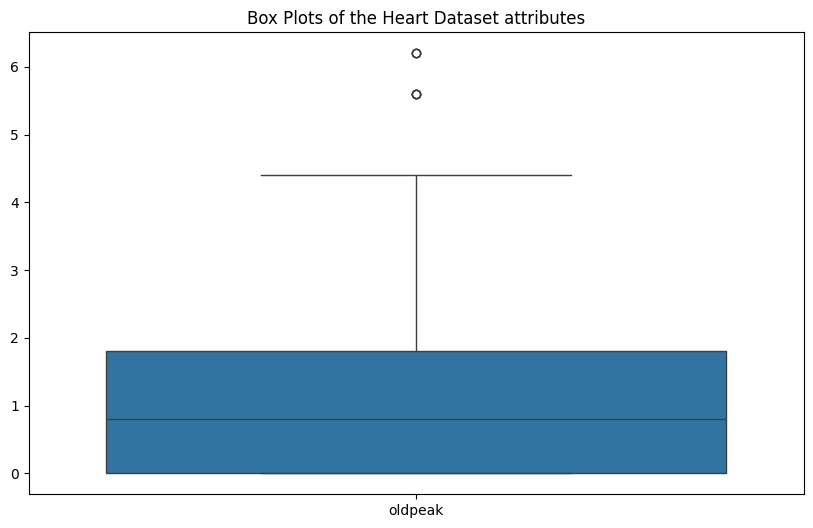

In [9]:
# Boxplot
cols = ["oldpeak"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_dataset[cols], orient='v')
plt.title('Box Plots of the Heart Dataset attributes')
plt.show()

## Value Counts

**Purpose**: Value counts reveal the distribution of categorical and ordinal variables, allowing to:
- Identify class imbalances within features (e.g., predominantly male patients)
- Detect rare categories that might cause issues in modeling

**Method**: all nominal and ordinal variables were systematically examined to ensure no category is overlooked.

In [10]:
# Categorical and ordinal variables value counts
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print("Value Counts for Categorical/Ordinal Features")
print("=" * 60)
for feature in categorical_features:
    print(f"\n{feature.upper()} counts:")
    print(heart_dataset[feature].value_counts().sort_index())
    print("-" * 40)

Value Counts for Categorical/Ordinal Features

SEX counts:
sex
0    312
1    713
Name: count, dtype: int64
----------------------------------------

CP counts:
cp
0    497
1    167
2    284
3     77
Name: count, dtype: int64
----------------------------------------

FBS counts:
fbs
0    872
1    153
Name: count, dtype: int64
----------------------------------------

RESTECG counts:
restecg
0    497
1    513
2     15
Name: count, dtype: int64
----------------------------------------

EXANG counts:
exang
0    680
1    345
Name: count, dtype: int64
----------------------------------------

SLOPE counts:
slope
0     74
1    482
2    469
Name: count, dtype: int64
----------------------------------------

CA counts:
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
----------------------------------------

THAL counts:
thal
0      7
1     64
2    544
3    410
Name: count, dtype: int64
----------------------------------------


# 3. Plot Analysis

## Histograms with KDE

**Purpose**: they reveal the underlying distribution shape of each variable. They are crucial for:
- **Normality Assessment**: Many statistical tests assume normal distributions
- **Outlier Detection**: Visual identification of extreme values
- **Transformation Decisions**: Skewed distributions may benefit from log or power transformations

**KDE (Kernel Density Estimation)**: The smooth curve overlaid on histograms provides a continuous estimate of the probability density function, making it easier to identify distribution patterns (normal, skewed, bimodal, etc.).


**Interval and Ratio**

- Age, thalach: roughly normal or slightly skewed distributions.
- Chol, trestbps: right-skewed due to extreme values (cholesterol ≥ 500 mg/dL, BP ≥ 180–200 mmHg).
- Oldpeak: left-skewed (most patients have values close to 0).

**Nominal and Ordinal Variables**

- Sex: confirms imbalance (≈70% males).
- Thal, slope, cp: some categories dominate (e.g., 50% of thal = 2).
- Fbs, restecg, exang: few distinct categories, with clear mode concentration.

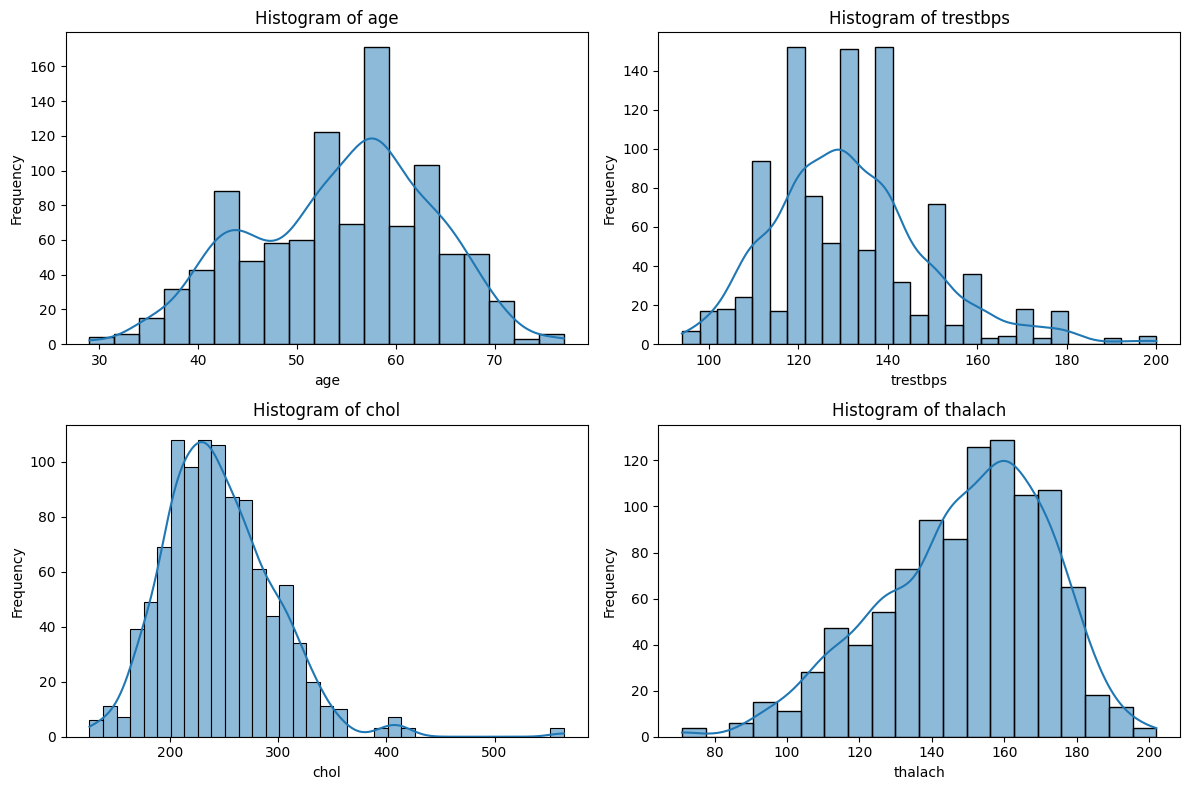

In [11]:
metric_set = heart_dataset.drop(['sex','cp','exang','fbs','restecg','slope','ca','thal','target'],axis =1)
plt.figure(figsize=(12, 8))

# For each column in the dataset but hte last one (-1)
for i, feature in enumerate(metric_set.columns[:-1]):
    # Create a subplot in a 2x2 grid of plots
    plt.subplot(2,2, i + 1)
    # kde=True and an estimate of the density distribution based on kernels
    sns.histplot(metric_set[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

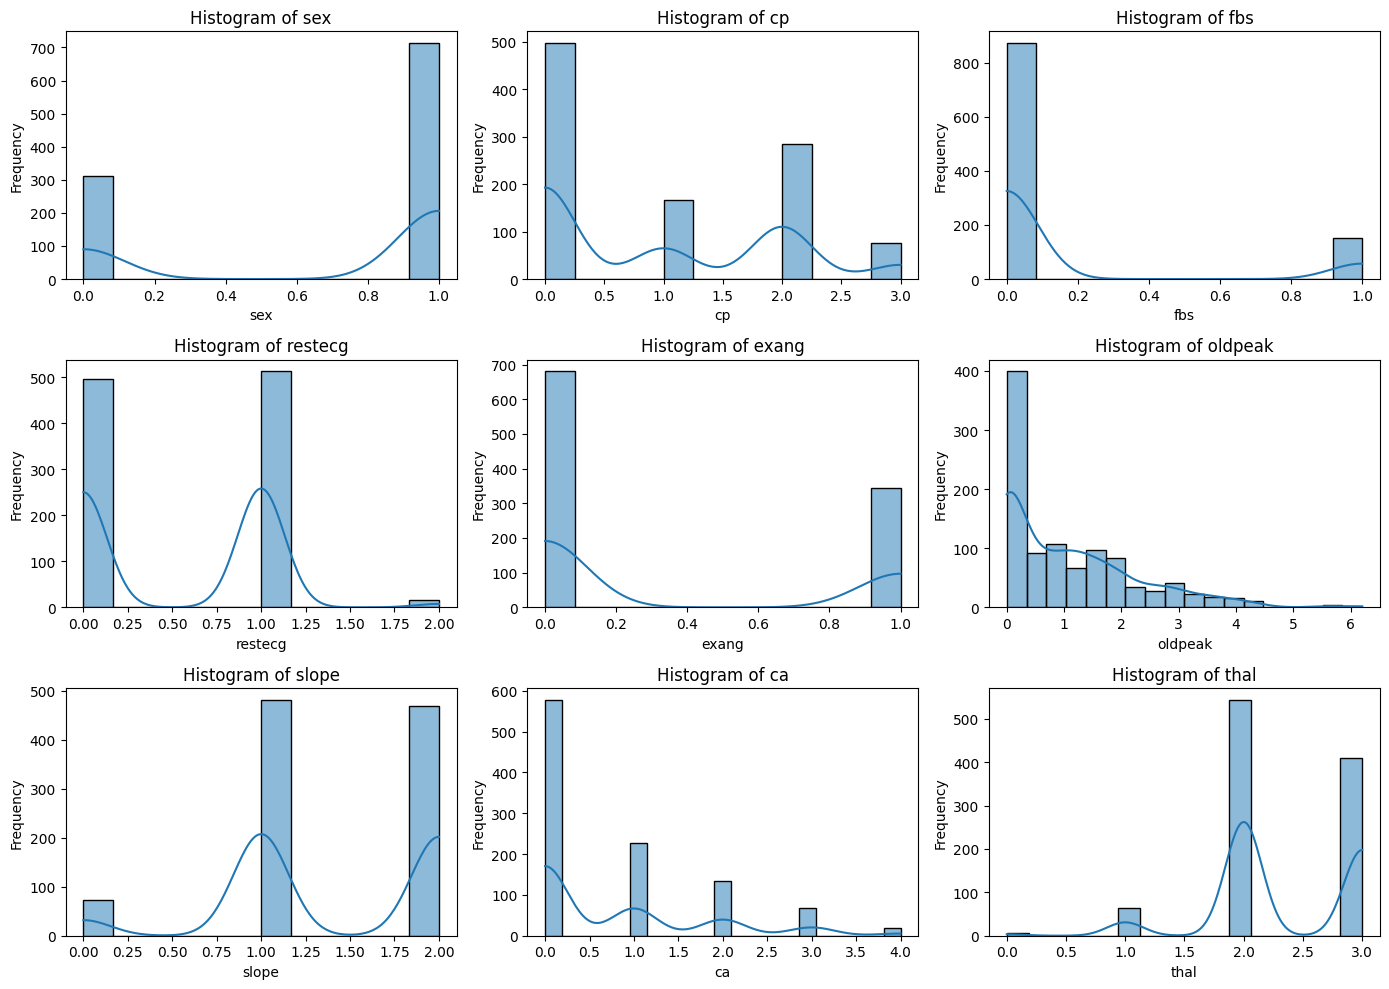

In [12]:

non_metric_set = heart_dataset.drop(['age','chol','thalach','trestbps'],axis =1)
plt.figure(figsize=(14, 10))

# For each column in the dataset but hte last one (-1)
for i, feature in enumerate(non_metric_set.columns[:-1]):
    # Create a subplot in a 2x2 grid of plots
    plt.subplot(3,3, i + 1)
    # kde=True and an estimate of the density distribution based on kernels
    sns.histplot(non_metric_set[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Pairwise Scatter Plots (Pairplot)

**Purpose**: Scatter plot matrices visualize relationships between all pairs of variables simultaneously, enabling:
- **Bivariate Relationship Detection**: Identify linear, non-linear, or no relationships between variable pairs
- **Class Separation Assessment**: Colored by target, we can see which variable combinations best separate healthy vs. diseased patients
- **Multivariate Pattern Recognition**: Complex interactions between multiple variables become visible

**Color Coding**: Blue (no disease) vs. Red (disease) allows immediate visual assessment of which variable ranges are associated with cardiovascular conditions.

###**Results summary**

**Group 1 – Continuous Physiological Variables**
| **Attribute** | **Observation**                                                                                                      |
| ------------- | -------------------------------------------------------------------------------------------------------------------- |
| **thalach**   | Clear inverse relationship with *age*; patients with disease (red) cluster at lower *thalach* values at higher ages. |
| **oldpeak**   | Separates diseased patients well (higher values).                                                                    |
| **chol**      | Strong overlap between classes, low correlation with *target*.                                                       |
| **trestbps**  | Strong overlap, low correlation with *target*.                                                                       |
| **age**       | Slightly higher among patients with disease.                                                                         |

**Group 2 – Symptoms and Exercise Response**
| **Attribute** | **Observation**                                                             |
| ------------- | --------------------------------------------------------------------------- |
| **cp**        | Healthy individuals (blue) are concentrated in lower chest pain categories. |
| **exang**     | Distinguishes well between groups, especially when combined with *oldpeak*. |
| **slope**     | Differentiates groups effectively together with *oldpeak*.                  |
| **oldpeak**   | Increases markedly in patients with disease.                                |
| **thalach**   | Again shows an inverse relationship with cardiovascular risk.               |

**Group 3 – Anatomical / Functional Findings**
| **Attribute** | **Observation**                                                                     |
| ------------- | ----------------------------------------------------------------------------------- |
| **ca**        | High values appear almost exclusively in patients with disease → highly predictive. |
| **thal**      | Reversible or fixed defects occur mainly in patients with disease.                  |
| **slope**     | Flat or descending slopes are linked to disease.                                    |
| **oldpeak**   | Shows a clear difference between classes (higher in diseased patients).             |

**Group 4 – Classic Risk Factors**
| **Attribute** | **Observation**                                              |
| ------------- | ------------------------------------------------------------ |
| **sex**       | Most patients with disease are men.                          |
| **age**       | Positive trend with disease presence.                        |
| **trestbps**  | Low discriminative power; strong overlap.                    |
| **chol**      | Similar values across both classes.                          |
| **fbs**       | Minimal separation between groups; low predictive relevance. |



### General Pairplot (all 14 features)

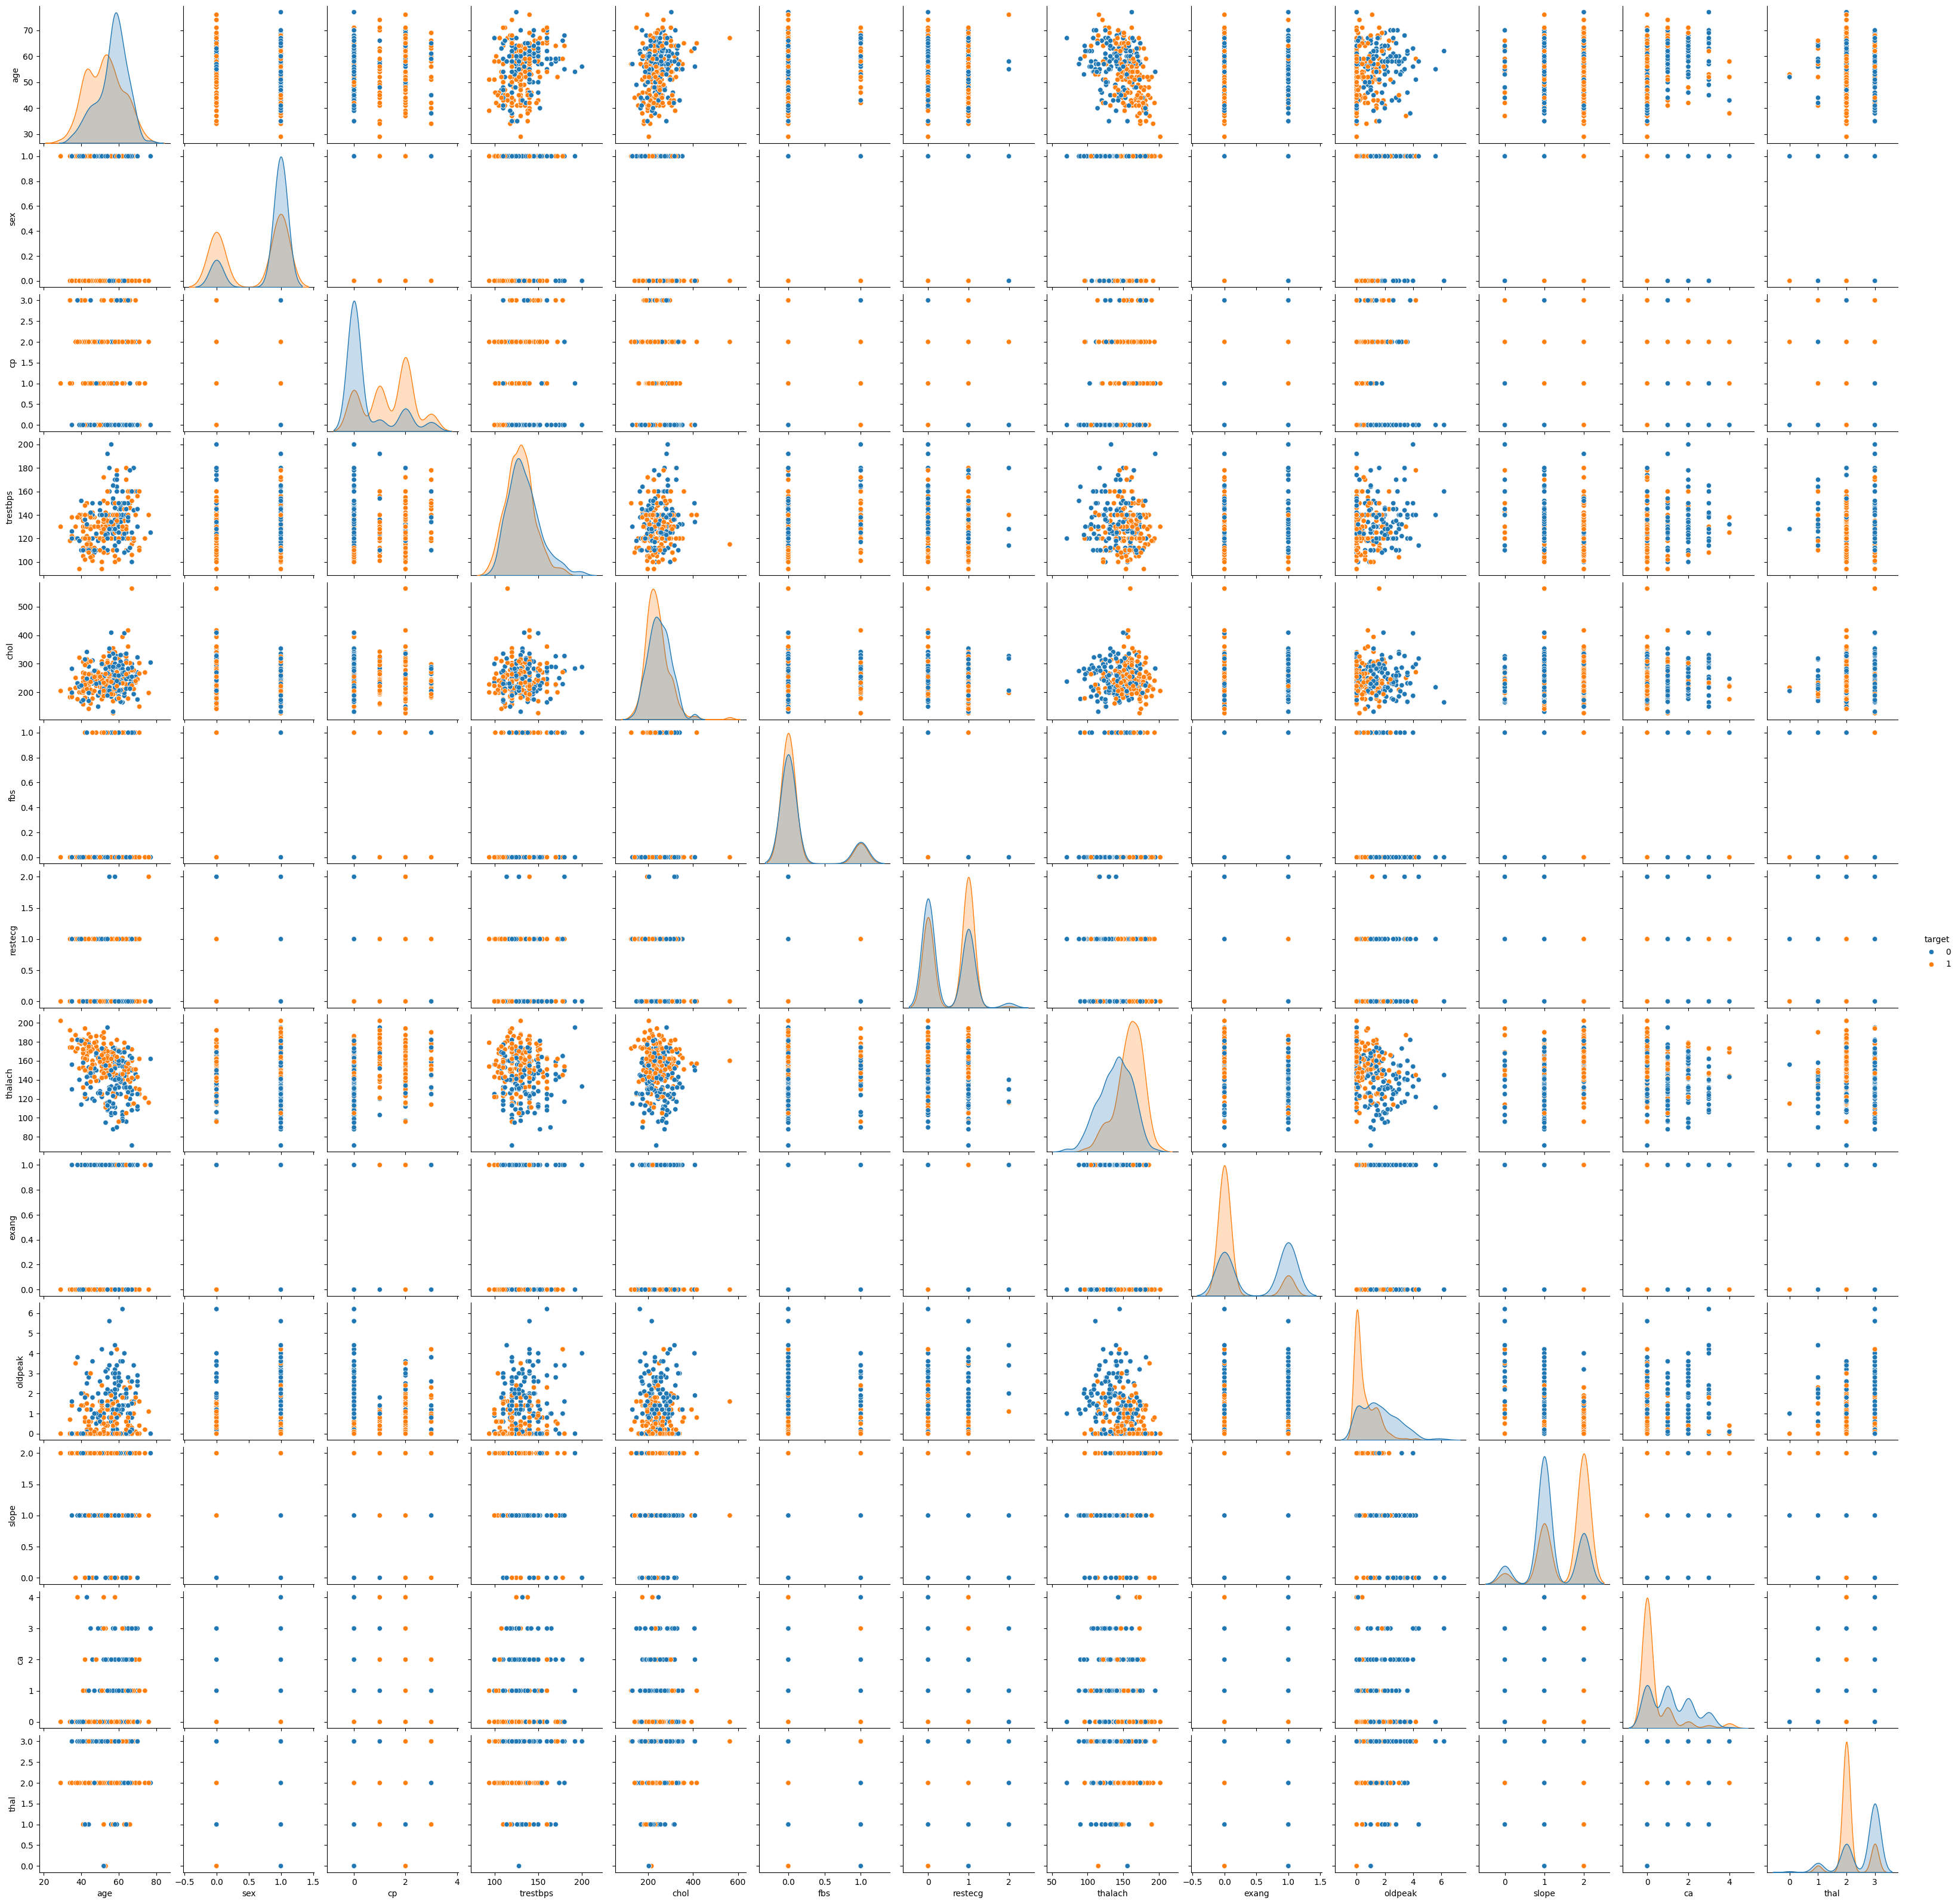

In [13]:
sns.pairplot(heart_dataset, hue='target')
plt.show()

### Group 1

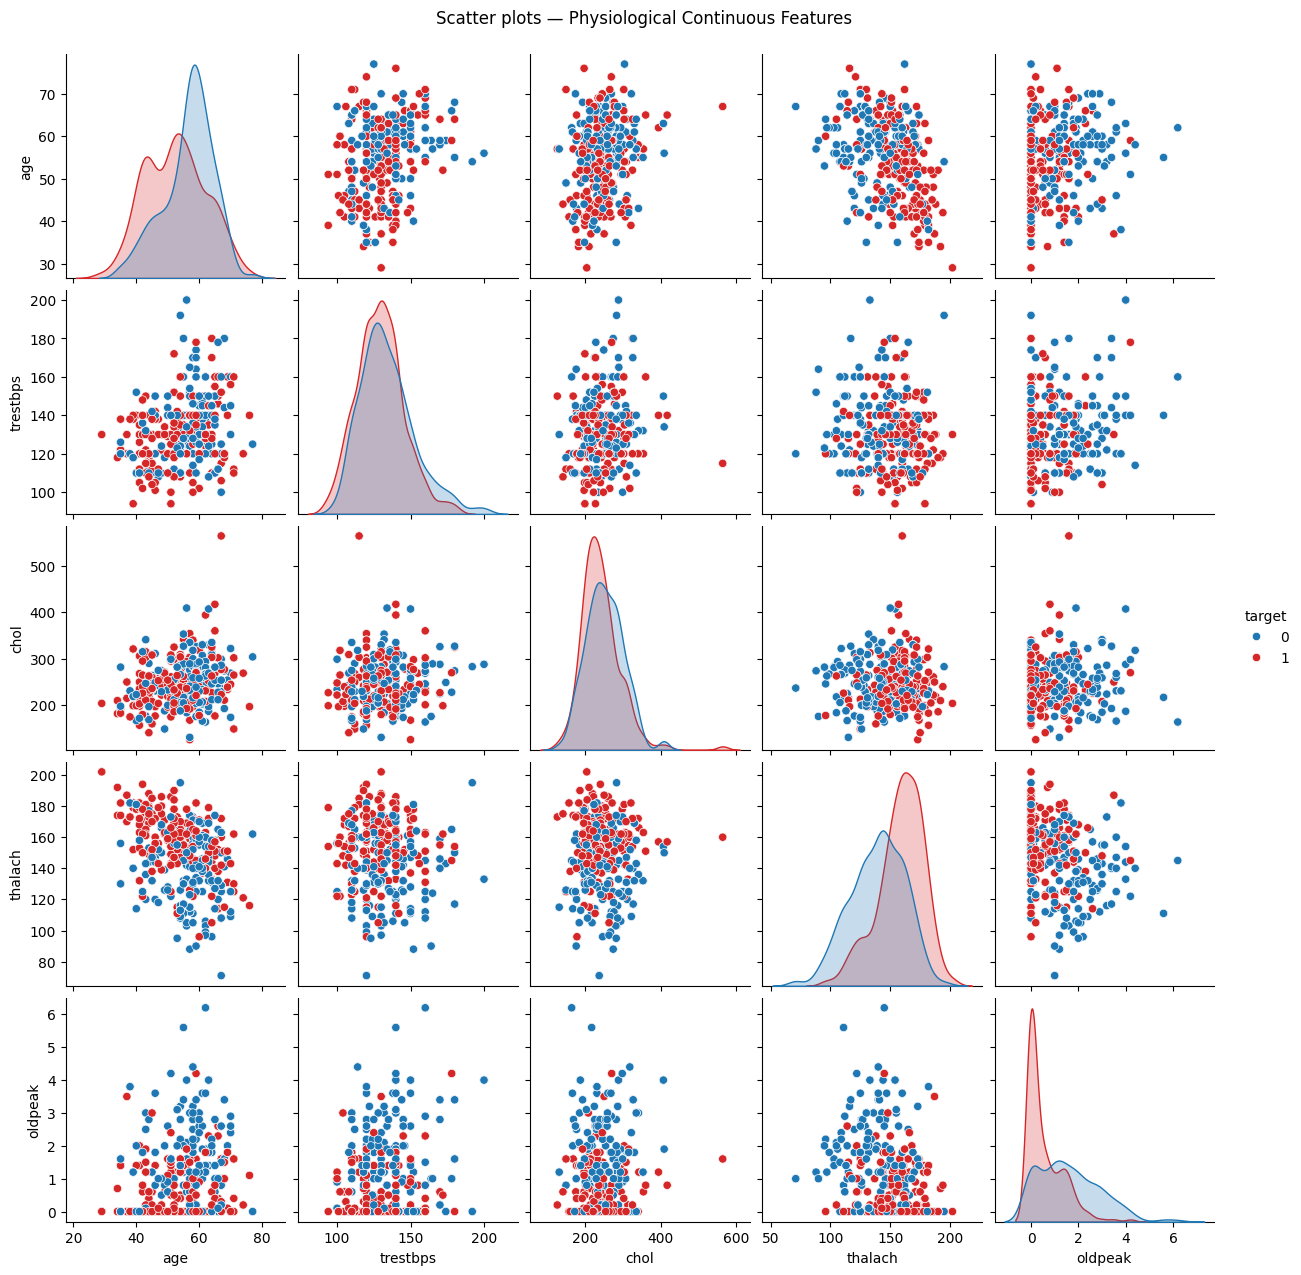

In [14]:
df = heart_dataset.copy()

# Colours
palette = {0: "tab:blue", 1: "tab:red"}

# === For grouping the plairplots ===
def scatter_group(df, cols, title):
    sns.pairplot(df[cols + ["target"]], hue="target", palette=palette, diag_kind="kde")
    plt.suptitle(title, y=1.02)
    plt.show()

# 1) Continuas fisiológicas
scatter_group(df, ["age", "trestbps", "chol", "thalach", "oldpeak"], "Scatter plots — Physiological Continuous Features")

### Group 2

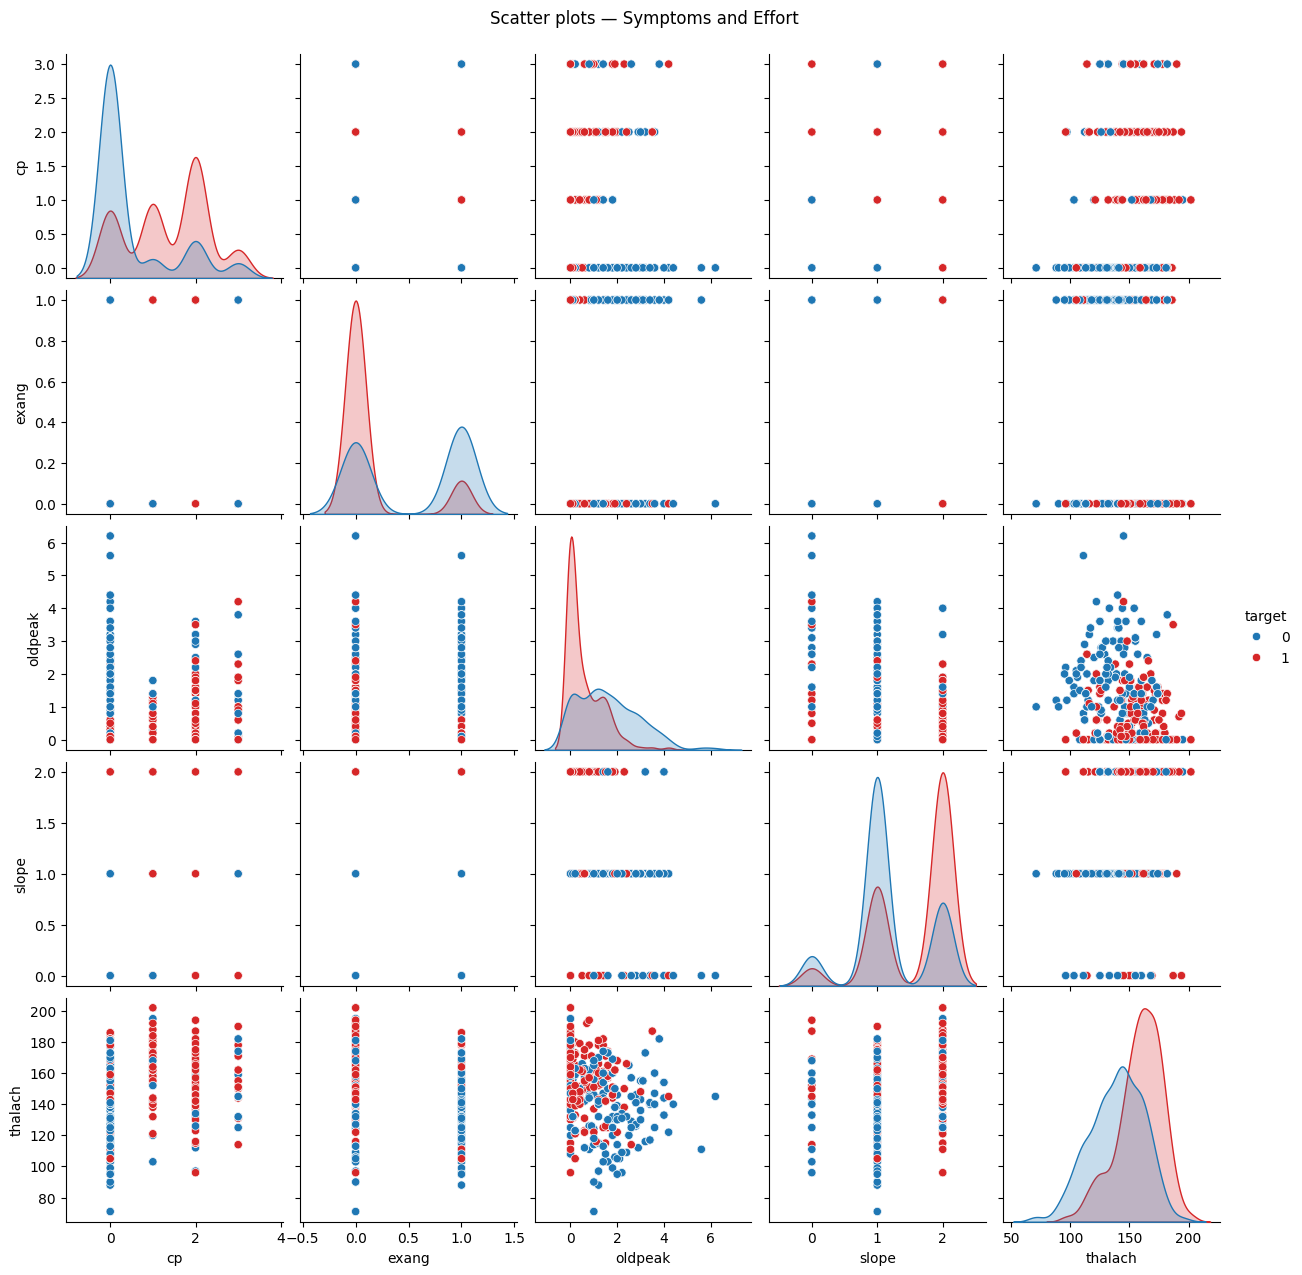

In [15]:
# 2) Symptoms and Effort"
scatter_group(df, ["cp", "exang", "oldpeak", "slope", "thalach"], "Scatter plots — Symptoms and Effort")

###Group 3

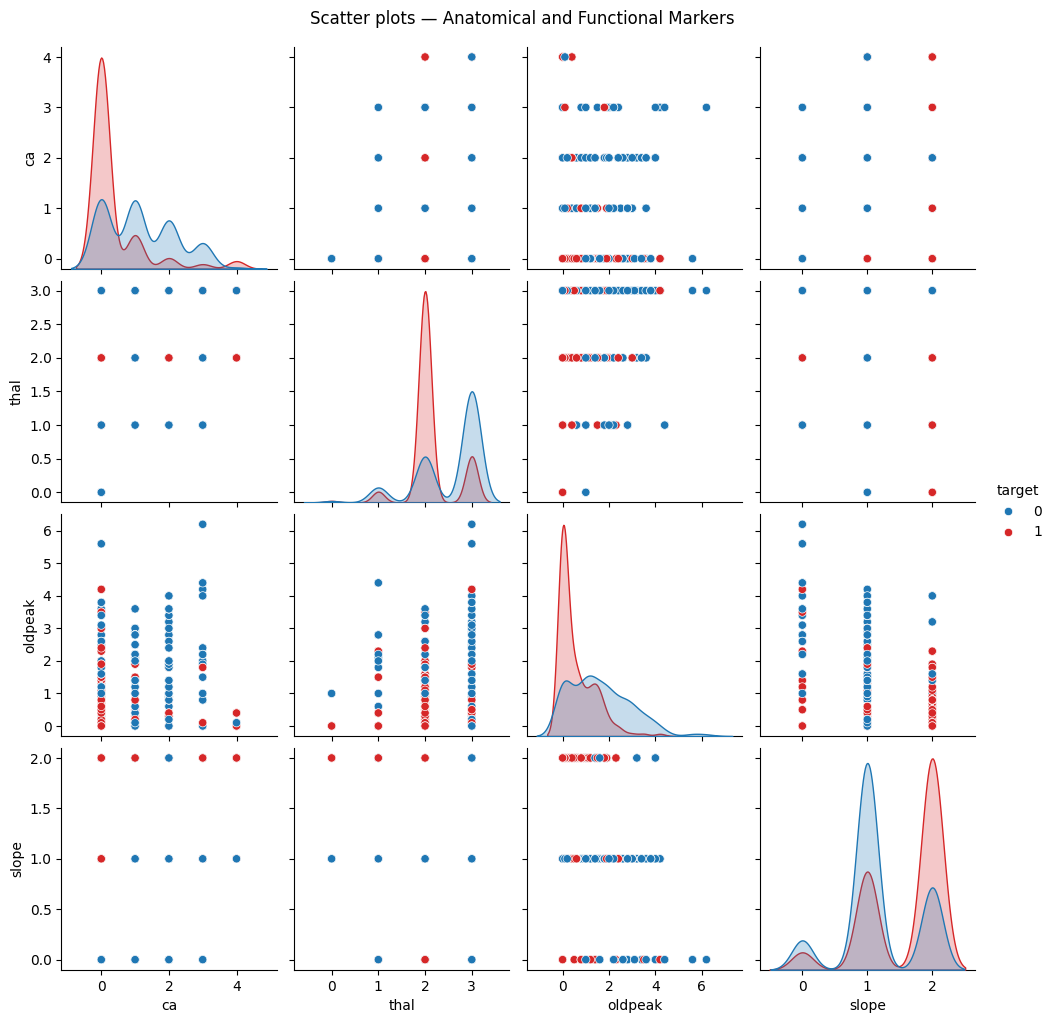

In [16]:
# 3) Anatomical and Functional Markers
scatter_group(df, ["ca", "thal", "oldpeak", "slope"], "Scatter plots — Anatomical and Functional Markers")

### Group 4

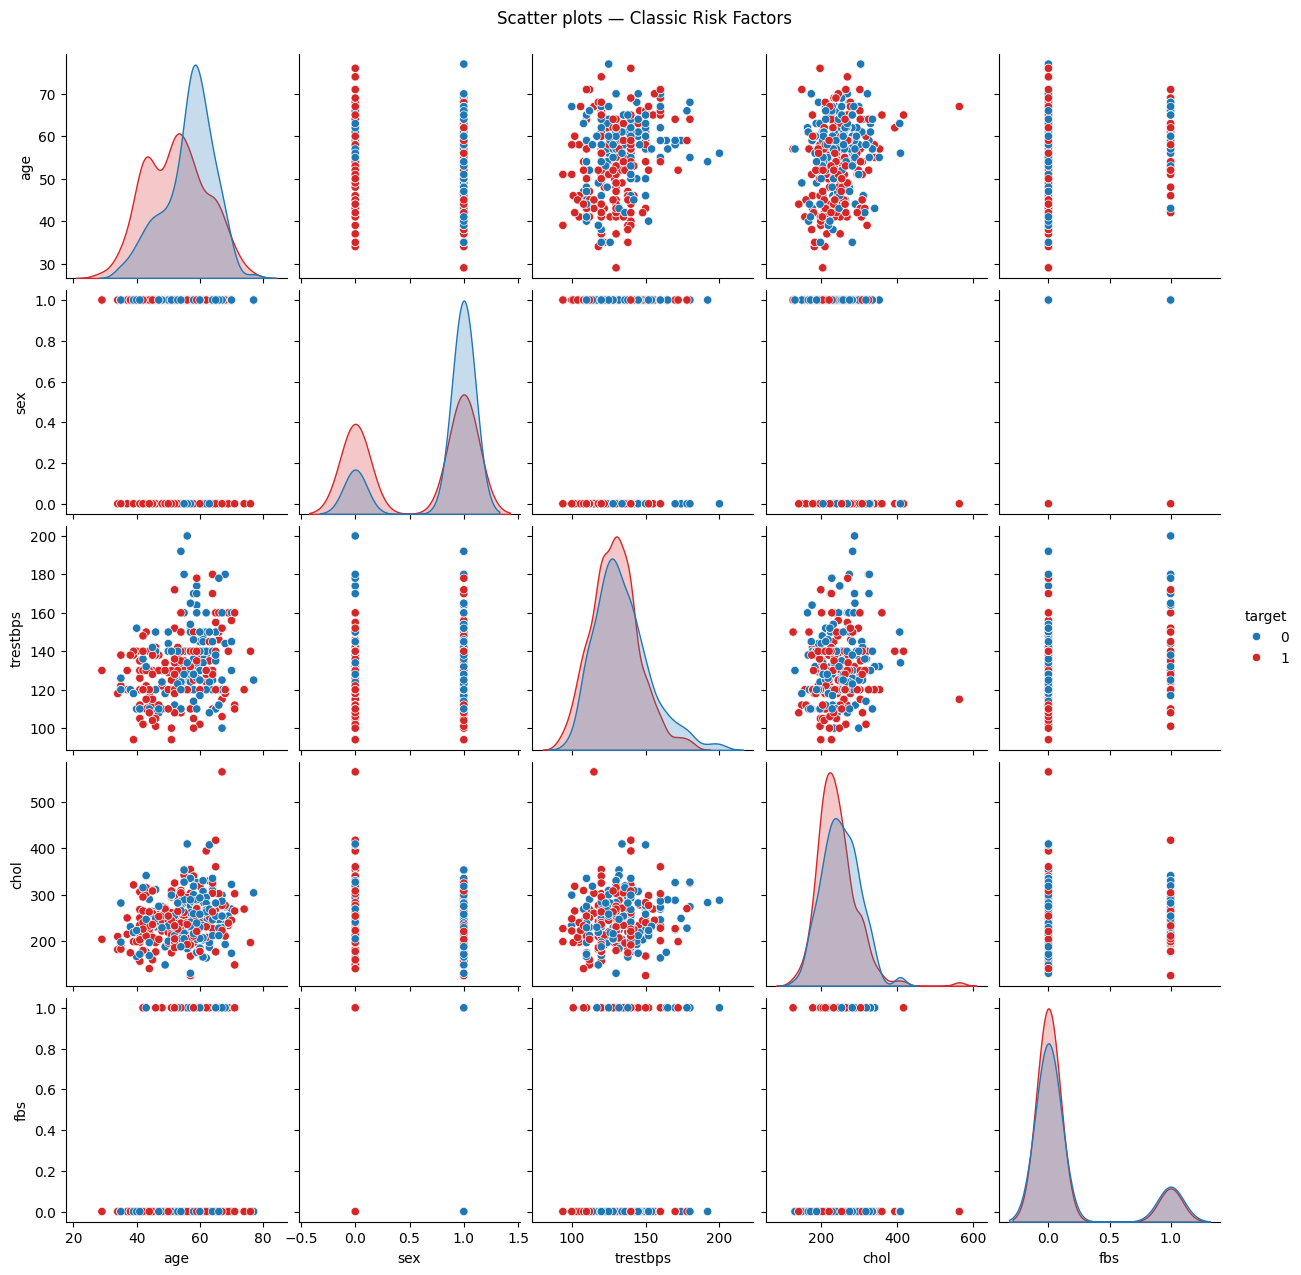

In [17]:
# 4) Classic Risk Factors
scatter_group(df, ["age", "sex", "trestbps", "chol", "fbs"], "Scatter plots — Classic Risk Factors")

# 4. Correlation matrix and Parallel Coordinates Plots with initial dataset

## Correlation Matrix
**Purpose**: The correlation matrix quantifies the strength and direction of linear relationships between all numeric variables.

**Interpretation**:
- **Values range from -1 to +1**
  - +1: Perfect positive correlation
  - 0: No linear correlation
  - -1: Perfect negative correlation
- **Color intensity**: Darker colors indicate stronger correlations (positive or negative)

**Why This Matters for Heart Disease Prediction**:
1. **Feature Selection**: Variables with high correlation to `target` are strong predictive candidates
2. **Multicollinearity Detection**: Highly correlated independent variables (e.g., |r| > 0.8) may cause issues in certain models
3. **Feature Engineering**: Correlated variables might be combined or one might be dropped to reduce dimensionality

**Threshold Interpretation**:
- |r| > 0.40: Strong correlation (clinically significant)
- 0.20 < |r| ≤ 0.40: Moderate correlation
- |r| ≤ 0.20: Weak/negligible correlation

##**Most correlated features**

| Pair                 | r     | Interpretation                                                |
| -------------------- | ----- | ------------------------------------------------------------- |
| `cp` / `target`      | +0.43 | Type of chest pain is a strong positive predictor of disease. |
| `thalach` / `target` | −0.42 | Lower max heart rate → more likely to have disease.           |
| `target` / `exang`   | +0.44 | Exercise-induced angina appears mainly in sick patients.      |
| `target` / `oldpeak` | +0.40 | ST depression correlates with heart condition.                |
| `target` / `slope`   | +0.35 | Descending/flat slope during exercise → higher risk.          |
| `cp` / `thalach`     | +0.31 | Patients with typical angina tend to have lower HR.           |
| `oldpeak` / `exang`  | +0.31 | Angina is associated with greater ST depression.              |


**Least correlated features (|r| ≤ 0.10):**

trestbps, chol, fbs, and restecg show minimal direct association with the target.

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

<Axes: >

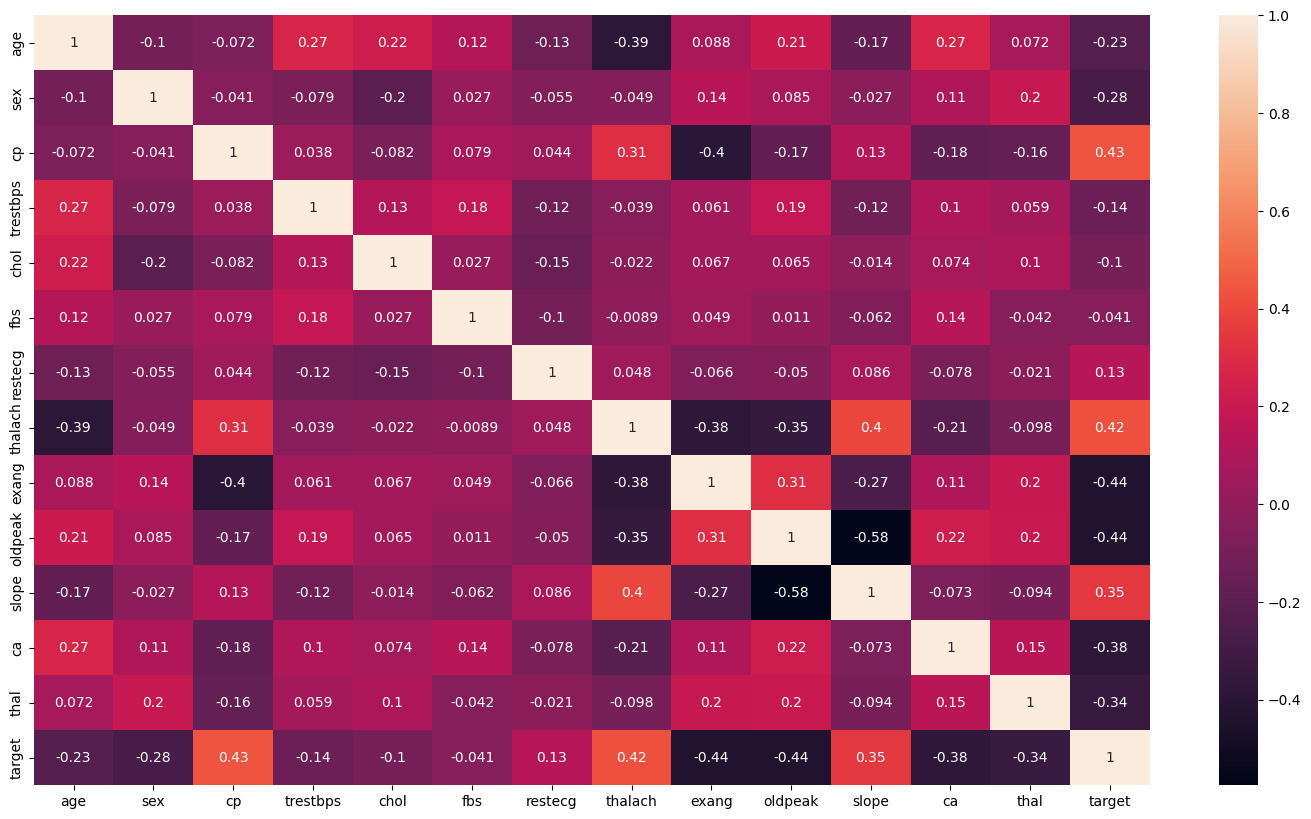

In [18]:
print (heart_dataset.corr(numeric_only= True))
plt.figure(figsize=(18, 10))
sns.heatmap(heart_dataset.corr(numeric_only= True),annot = True)

## Parallel Coordinates

**Purpose**: Parallel coordinates transform multivariate data into a 2D visualization where:
- Each vertical axis represents one variable
- Each line represents one patient/observation
- Line color indicates the target class (disease presence)

**Why Use This Visualization?**:
1. **Multivariate Pattern Detection**: See how multiple variables interact simultaneously
2. **Class Discrimination**: Visual separation of healthy vs. diseased lines shows which variable combinations distinguish the classes
3. **Feature Importance**: Variables where lines cross heavily have overlapping distributions (low discriminative power), while variables with clear separation are more predictive

**Normalization**: We normalize all variables to [0, 1] range to:
- Prevent variables with large ranges from dominating the visualization
- Enable fair comparison across different measurement scales (e.g., age in years vs. cholesterol in mg/dL)

**Note**: We'll show both Matplotlib (static) and Plotly (interactive) versions for different use cases.

### Parallel Coordinates of 14 features

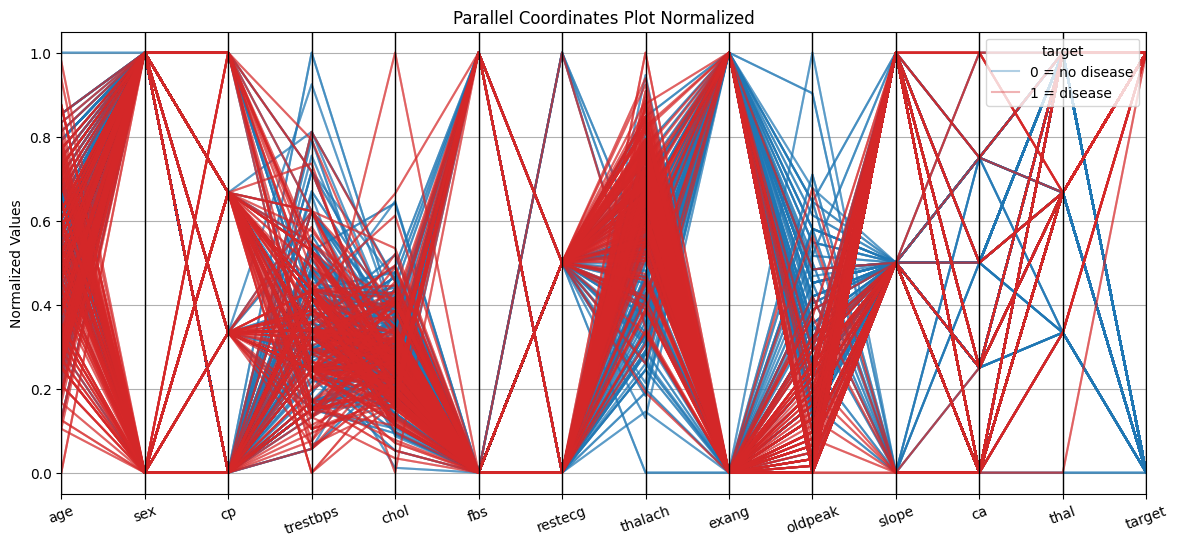

In [19]:
from pandas.plotting import parallel_coordinates
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs",
        "restecg", "thalach", "exang", "oldpeak", "slope",
        "ca", "thal", "target"]
heart_subset = heart_dataset[cols].copy()

heart_norm = heart_subset.copy()
for col in cols[:-1]:  # except target
    col_min = heart_norm[col].min()
    col_max = heart_norm[col].max()
    heart_norm[col] = 0.0 if col_max == col_min else (heart_norm[col] - col_min) / (col_max - col_min)

heart_norm["target_str"] = heart_norm["target"].map({0: "0 = no disease", 1: "1 = disease"})
order = ["0 = no disease", "1 = disease"]
heart_norm["target_str"] = pd.Categorical(heart_norm["target_str"], categories=order, ordered=True)



plt.figure(figsize=(14,6))
parallel_coordinates(
    heart_norm.sort_values("target_str"),
    "target_str",
    color=["tab:blue", "tab:red"],
    alpha=0.35
)
plt.title("Parallel Coordinates Plot Normalized")
plt.ylabel("Normalized Values")
plt.xticks(rotation=20)
plt.legend(title="target", loc="upper right")
plt.show()


### Parallel Coordinates Plots

In [20]:
fig = px.parallel_coordinates(heart_dataset, color= heart_dataset['target'].astype('category').cat.codes,
                              dimensions=['thalach', 'oldpeak',
                                          'chol', 'trestbps', 'age'])
fig.update_layout(width=1100, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()


In [21]:
plt.figure(figsize=(10,6))

fig = px.parallel_coordinates(heart_dataset, color= heart_dataset['target'].astype('category').cat.codes,
                              dimensions=['cp', 'exang',
                                          'slope', 'oldpeak', 'thalach'])
fig.update_layout(width=1100, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()

<Figure size 1000x600 with 0 Axes>

In [22]:
plt.figure(figsize=(10,6))

fig = px.parallel_coordinates(heart_dataset, color= heart_dataset['target'].astype('category').cat.codes,
                              dimensions=['ca', 'thal',
                                          'slope', 'oldpeak', 'age'])
fig.update_layout(width=1100, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()

<Figure size 1000x600 with 0 Axes>

In [23]:
plt.figure(figsize=(10,6))

fig = px.parallel_coordinates(heart_dataset, color= heart_dataset['target'].astype('category').cat.codes,
                              dimensions=['sex', 'age',
                                          'trestbps', 'chol', 'fbs'])
fig.update_layout(width=1100, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()

<Figure size 1000x600 with 0 Axes>

### Normalized Parallel Coordinates Plots

In [24]:

cols = ["age", "sex", "cp", "trestbps", "chol", "fbs",
        "restecg", "thalach", "exang", "oldpeak", "slope",
        "ca", "thal", "target"]
heart_subset = heart_dataset[cols].copy()

heart_norm = heart_subset.copy()
for col in cols[:-1]:  # except target
    col_min = heart_norm[col].min()
    col_max = heart_norm[col].max()
    heart_norm[col] = 0.0 if col_max == col_min else (heart_norm[col] - col_min) / (col_max - col_min)

heart_norm["target_str"] = heart_norm["target"].map({0: "0 = no disease", 1: "1 = disease"})
order = ["0 = no disease", "1 = disease"]
heart_norm["target_str"] = pd.Categorical(heart_norm["target_str"], categories=order, ordered=True)

fig = px.parallel_coordinates(heart_norm, color= heart_norm['target'].astype('category').cat.codes,
                              dimensions=['thalach', 'oldpeak',
                                          'chol', 'trestbps', 'age'])
fig.update_layout(width=1000, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()

In [25]:

plt.figure(figsize=(10,6))

fig = px.parallel_coordinates(heart_norm, color= heart_norm['target'].astype('category').cat.codes,
                              dimensions=['cp', 'exang',
                                          'slope', 'oldpeak', 'thalach'])
fig.update_layout(width=1000, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()

<Figure size 1000x600 with 0 Axes>

In [26]:
plt.figure(figsize=(10,6))

fig = px.parallel_coordinates(heart_norm, color= heart_norm['target'].astype('category').cat.codes,
                              dimensions=['ca', 'thal',
                                          'slope', 'oldpeak', 'age'])
fig.update_layout(width=1000, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()

<Figure size 1000x600 with 0 Axes>

In [27]:
plt.figure(figsize=(10,6))

fig = px.parallel_coordinates(heart_norm, color= heart_norm['target'].astype('category').cat.codes,
                              dimensions=['sex', 'age',
                                          'trestbps', 'chol', 'fbs'])
fig.update_layout(width=1000, height=600, margin=dict(l=40, r=40, t=40, b=40))
fig.show()

<Figure size 1000x600 with 0 Axes>

# 5. Bivariate Analysis (Feature vs Target)

## Bivariate Analysis: Feature vs. Target

**Purpose**: Bivariate analysis examines the relationship between each individual feature and the target variable (heart disease presence). This is crucial for:
- **Feature Ranking**: Identify which individual variables are most predictive
- **Understanding Mechanism**: See HOW each variable relates to disease (e.g., higher, lower, or specific categories)
- **Model Interpretation**: Prepare insights for explaining model predictions to stakeholders

**Method - Overlapping Histograms with KDE**:
- **Overlapping distributions**: Show the probability density for healthy (blue) vs. diseased (red) patients on the same axis
- **Visual separation assessment**: Clear separation indicates strong discriminative power
- **Distribution shape comparison**: Reveals whether diseased patients have systematically different values (shifted mean, different variance, etc.)

**Interpretation Guide**:
- **Strong separation** (minimal overlap): Variable is highly predictive
- **Different distribution shapes**: May indicate non-linear relationships
- **Complete overlap**: Variable has little to no individual predictive power

### **Continuous Variables**
| Feature      | Observation                                   | Interpretation                            |
| ------------ | --------------------------------------------- | ----------------------------------------- |
| **Age**      | Slightly higher median for diseased patients. | Age increases risk, moderate influence.   |
| **Trestbps** | Overlapping distributions.                    | Weak relationship.                        |
| **Chol**     | Almost identical across classes.              | Negligible impact.                        |
| **Thalach**  | Lower for diseased patients.                  | Lower max HR → higher probability of CVD. |
| **Oldpeak**  | Higher in diseased patients.                  | Strong indicator of ischemic depression.  |

### **Categorical Variables**
| Feature     | Observation                                                                | Interpretation                 |
| ----------- | -------------------------------------------------------------------------- | ------------------------------ |
| **Sex**     | Majority of patients with CVD are male.                                    | Confirms male bias in dataset. |
| **Cp**      | `cp=0` (typical angina) and `cp=3` (asymptomatic) common in disease group. | Strong positive correlation.   |
| **Fbs**     | Similar proportions across classes.                                        | Irrelevant predictor.          |
| **Restecg** | Minimal difference between groups.                                         | Very low correlation.          |
| **Exang**   | Higher frequency of positive angina among diseased patients.               | Strong positive correlation.   |
| **Slope**   | CVD group shows flat/descending slopes.                                    | Typical ischemic response.     |
| **Ca**      | Diseased patients often have 2–3 affected vessels.                         | High positive correlation.     |
| **Thal**    | Diseased patients mostly `thal=2–3` (defective).                           | Strong diagnostic indicator.   |


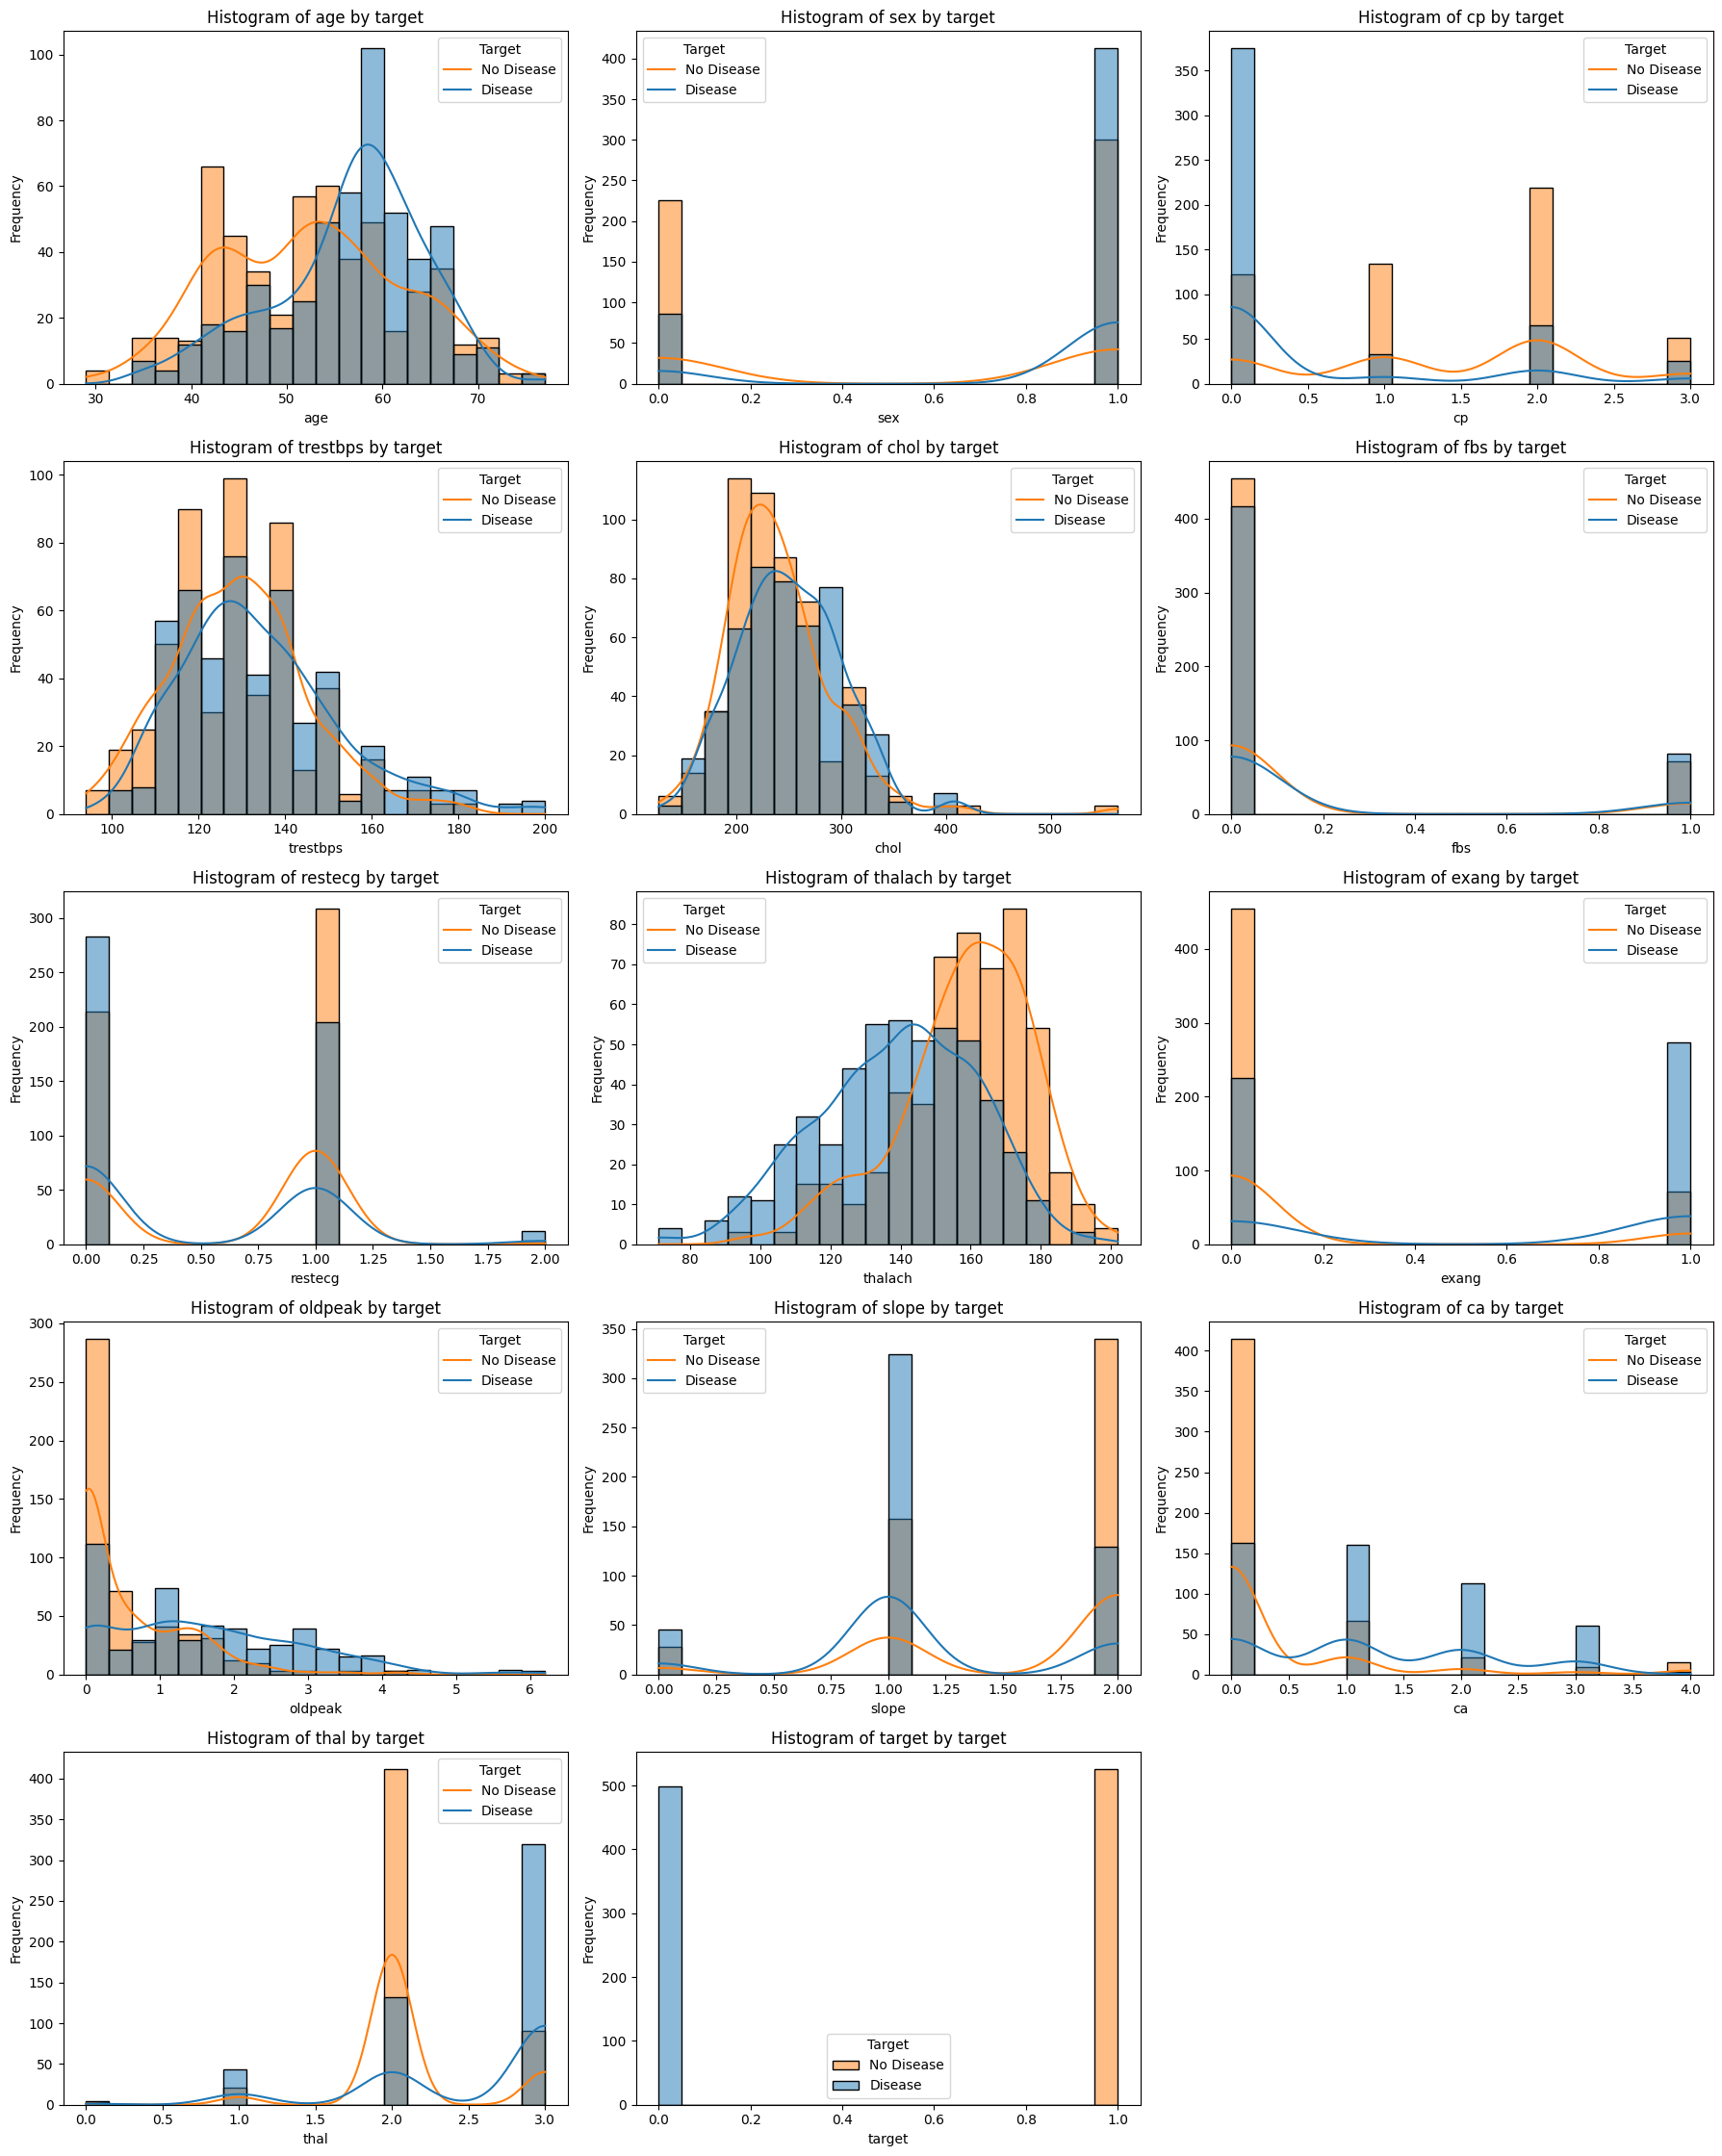

In [28]:
num_feats = list(heart_dataset.columns)
n = len(num_feats)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(6*cols, 4.5*rows))
for i, feature in enumerate(num_feats):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=heart_dataset, x=feature, hue="target", bins=20, kde=True)
    plt.title(f'Histogram of {feature} by target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title="Target", labels=["No Disease", "Disease"])

plt.tight_layout()
plt.show()

#**Credits**
## Raquel Hernanz Hernández